## Classical ML

Here by classical ML we loosely refer to ML that does not employ neural networks. They are classical mainly since these are the methods that used to perform well (and still do) before the neural networks started to shine in most of the ML tasks. 

One should always when performing ML think whether the methods applied are well suited to the problem at hand. Quite often it may turn out that the 'simpler' classical methods can perform equally well, be more interpretable, and easier to use than neaural networks. This is in no way to say that one should favor one method over another - it is just trying to point out that sometimes you do not need to hit a fly with an axe.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
from sklearn.model_selection import train_test_split

%matplotlib inline 
# Define some plotting params:
mpl.rcParams['figure.figsize'] = (12,6)
sns.set_style("whitegrid", {"axes.facecolor": ".97"})

data = sns.load_dataset('penguins').dropna()
target = 'species'

X = data.drop(columns=target)
y = data.loc[:, target]
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Tree Classifier

Tree classifiers are one of the simplest ML methods out there. Tree training is based on a process where at each node you find a feature and a split value (f, $x_f$) such that if the instances in that current node are splitted accordingly the resulting two nodes are as pure as possible. This is continued until no split can be performed (pure nodes) or a termination condition is reached. We shall make this clear by example.



In [2]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_validate

tree = DecisionTreeClassifier(max_depth=2, criterion='entropy')

cross_validate(tree, X, y) # Will prdoce error!

/home/topiko/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/topiko/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/topiko/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/topiko/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 156, in fit
    X, y = self._validate_data(X, y,
  File "/home/topiko/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/home/topiko/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/utils/validation.py", line 72, in inner_f

{'fit_time': array([0.0040679 , 0.00316429, 0.00284839, 0.0031147 , 0.00529385]),
 'score_time': array([0., 0., 0., 0., 0.]),
 'test_score': array([nan, nan, nan, nan, nan])}

What is this! The stuff crashed. Lets look at the data training data $\mathbf{X}$. Notice the features **island** and **sex**. They are objects and thus tree classifier crashes whren trying to find splits by comparing: female > male... Here we shall just drop these feeatures, bu they could also be encoded using sklearn.encoding.OneHotEncoder to numerical values.

In [3]:
display(X.head())
X = X.drop(columns=['sex', 'island'])
X_train = X_train.drop(columns=['sex', 'island'])
X_test = X_test.drop(columns=['sex', 'island'])
print('After dropping X:')
X.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Torgersen,39.3,20.6,190.0,3650.0,Male


After dropping X:


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


Lets then see the cross valitaded accuracy score:

In [4]:
metric = 'accuracy'
score = cross_validate(tree, X, y, scoring=metric)['test_score'].mean()
print('Mean {} = {:.3f}'.format(metric, score))

Mean accuracy = 0.946


We get reasonable classification score even without the removed features so this is fine. Lets us look how a DecisionTreeLooks:

### Use dtreeviz to display the classification tree:

In [7]:
??dtreeviz

Signature:
dtreeviz(
    tree_model,
    x_data: (<class 'pandas.core.frame.DataFrame'>, <class 'numpy.ndarray'>) = None,
    y_data: (<class 'pandas.core.frame.DataFrame'>, <class 'numpy.ndarray'>) = None,
    feature_names: List[str] = None,
    target_name: str = None,
    class_names: (typing.Mapping[numbers.Number, str], typing.List[str]) = None,
    tree_index: int = None,
    precision: int = 2,
    orientation: ('TD', 'LR') = 'TD',
    instance_orientation: ('TD', 'LR') = 'LR',
    show_root_edge_labels: bool = True,
    show_node_labels: bool = False,
    show_just_path: bool = False,
    fancy: bool = True,
    histtype: ('bar', 'barstacked', 'strip') = 'barstacked',
    highlight_path: List[int] = [],
    X: numpy.ndarray = None,
    max_X_features_LR: int = 10,
    max_X_features_TD: int = 20,
    label_fontsize: int = 12,
    ticks_fontsize: int = 8,
    fontname: str = 'Arial',
    colors: dict = None,
    scale=1.0,
) -> dtreeviz.trees.DTreeViz
Source:   
def dtreeviz(tr

In [19]:
from sklearn.preprocessing import LabelEncoder
from dtreeviz.trees import *

tree_clf = DecisionTreeClassifier(max_depth=3)  # limit depth of tree

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
tree_clf.fit(X_train, y_train_enc)


viz = dtreeviz(tree_clf,
               X_train,
               y_train_enc,
               target_name='variety',
               feature_names=X_train.columns, 
               class_names=list(le.classes_),
               scale=2,
               X=X_test.iloc[0]) 
              
viz.view()

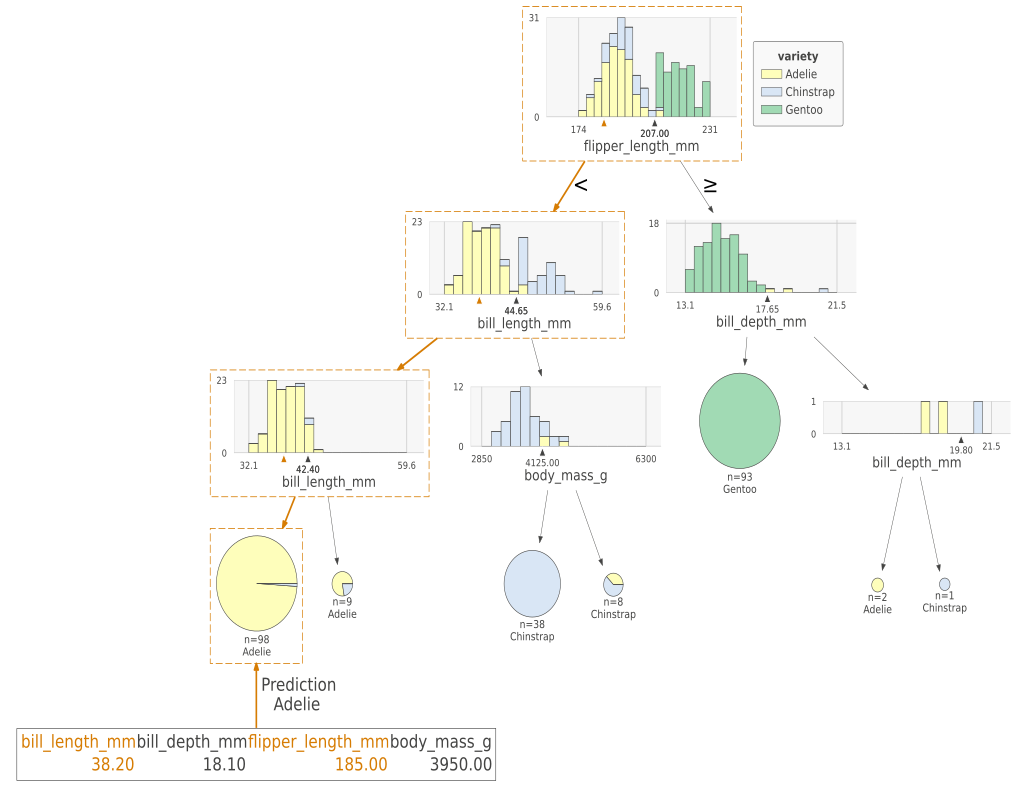

In [22]:
#In case above cell crashes due to missing graphviz or so
from IPython.display import Image

Image("DecisionPath.png")

## Math behind tree node splitting:

First we though need to define what *pure* means. We can measure the purity of a node by the amount of information entropy:

$
H(y) = -\sum_{i \in \text{classes}}  p_i \log_2 p_i,
$

where $p_i=\frac{n_i}{n}$ is the probability to find instances of class $i$ in node under consideration. One can see that in the sum if $p_i \in \{0, 1\}$ the contribution is 0. That is, pure nodes have $H=0$. We want to use $H$ to reason by which feature to split and where to place the split boundaries (see above fig.).

After a given split (*feature*, $t$) we obtain two nodes - one for instances with $\mathcal{L} = \{(\mathbf{x}, y) | x_\text{feature} < t, ~ \mathbf{x} \in \mathbf{X}_\text{train}\}$ and the other for intances $\mathcal{R} = \{(\mathbf{x}, y) | t \leq x_\text{feature}, ~\mathbf{x} \in \mathbf{X}_\text{train} \}$. We consider information gain in this split process:

$
\text{IG}(y, a) = H(y) - H(y|a), 
$

where $a \in \{\mathcal{L}, \mathcal{R}\}$ and $H(y|a)$ is the conditional entropy, that is, the information entropy that still remains when knowledge of the split side ($\mathcal{L}, \mathcal{R}$) is exposed. 

$
H(y|a) = \sum_{i \in \text{classes}} p(i|a) \log_2 p(i|a)
$

If the node is pure then conditional entropy goes to zero since the target class is completely determined by the split side. We perform split such that the expectation value of information gain is maximized, i.e.,

$
\text{I}(y; A) = \text{E}_A[\text{IG}(y, a)] = H(y) - \sum_{a\in\{\mathcal{L}, \mathcal{R}\}} p(a) H(y|a).
$

Equipped with above Eq. one only needs to find a split that maximizes the *mutual information* I$(y;A)$.  

## Random Forest Classifier:

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

RandomForestClassifier()

Automatically created module for IPython interactive environment


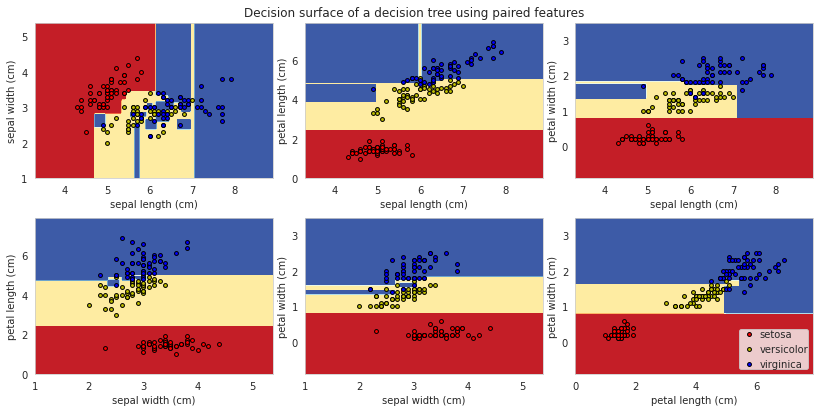

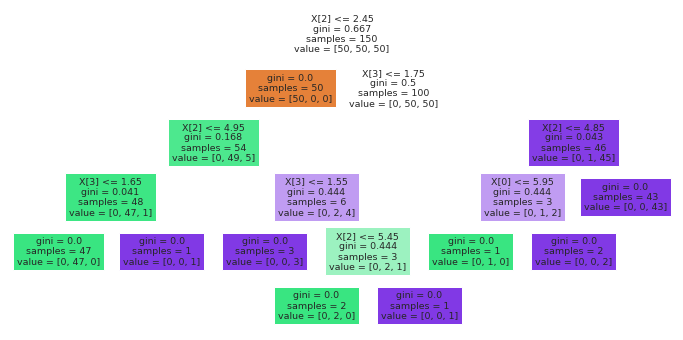

In [65]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure()
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.show()